# COVID-19 cases worldwide

This notebook provides useful information about the coronavirus outbreak across the world.
Although it was written in a programming language (Python), please ignore the code if you're not familiar to it.

The data here displayed is taken from a source published by the Johns Hopkins University. You can see at the  original source here: https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data.

However, I transformed the data into a more useful source for the purposes of this work. You might find the new format at https://github.com/McSonk/covid19/tree/master/data

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
from cv19.utils.plots import plot_country_cases, plot_top5, plot_country_deaths
from cv19.utils.manipulation import calc_changes

from datetime import datetime

%matplotlib inline
# Read data from csv
data = pd.read_csv('data/conf_per_day.csv', index_col='Date', parse_dates=True)
deaths = pd.read_csv('data/deaths_per_day.csv', index_col='Date', parse_dates=True)
# Update Mexican data
data['Mexico'] = data['Mexico'].shift(-1)
data.loc['2020-04-01', 'Mexico'] = 1378
#data.loc[datetime.strptime('2020-04-01', '%Y-%m-%d'), 'Mexico'] = 1378
data['Mexico'] = data['Mexico'].astype('int64')

deaths['Mexico'] = deaths['Mexico'].shift(-1)
deaths.loc['2020-03-22', 'Mexico'] = 2
deaths.loc['2020-03-23', 'Mexico'] = 4
deaths.loc['2020-04-01', 'Mexico'] = 37
#deaths.loc[datetime.strptime('2020-04-01', '%Y-%m-%d'), 'Mexico'] = 37
deaths['Mexico'] = deaths['Mexico'].astype('int64')
# Get the totals worldwide
data['the world'] = data.sum(axis=1)
deaths['the world'] = deaths.sum(axis=1)
# Calc the changes intradays
changes = calc_changes(data)
death_changes = calc_changes(deaths)

## Part 1: What are we talking about?

The further analysis presents the coronavirus confirmed cases we have information about across the several days the illness have been in the world.

In [7]:
print("Number of infected countries: %d" % data.columns.size)

Number of infected countries: 181


Top 10 countries by confirmed cases

the world         932,768
US                213,372
Italy             110,574
Spain             104,118
China              82,361
Germany            77,872
France             57,749
Iran               47,593
United Kingdom     29,865
Switzerland        17,768
Turkey             15,679
Name: 2020-04-01 00:00:00, dtype: object

--- Updated the March 21th, 2020
Source: Johns Hopkins University
932768


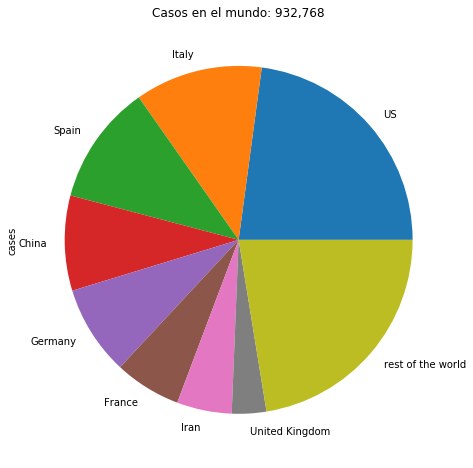

In [8]:
print("Top 10 countries by confirmed cases")
print()
print(data.iloc[-1].sort_values(ascending=False).apply(lambda x: '{:,}'.format(x)).head(11))
print()
print("--- Updated the March 21th, 2020")
print("Source: Johns Hopkins University")

test = data.iloc[-1].sort_values(ascending=False).head(9)
world = test['the world']
test.drop('the world', inplace=True)

test.name = 'cases'
test['rest of the world'] = world - test.sum()

print(test.sum())
plt.figure(figsize=(15, 8))
test.plot.pie()
plt.title('Casos en el mundo: %s' % f'{world:,}')
plt.show()

Top 10 countries by confirmed demises

the world         46,817
Italy             13,155
Spain              9,387
US                 4,757
France             4,043
China              3,316
Iran               3,036
United Kingdom     2,357
Netherlands        1,175
Germany              920
Belgium              828
Name: 2020-04-01 00:00:00, dtype: object

--- Updated the March 21th, 2020
Source: Johns Hopkins University


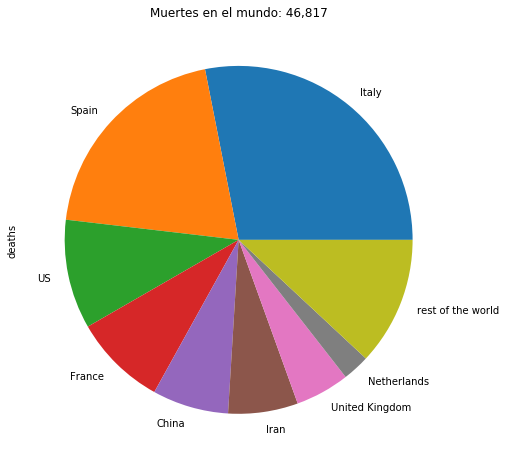

In [9]:
print("Top 10 countries by confirmed demises")
print()
print(deaths.iloc[-1].sort_values(ascending=False).apply(lambda x: '{:,}'.format(x)).head(11))
print()
print("--- Updated the March 21th, 2020")
print("Source: Johns Hopkins University")

deaths[['Spain', 'Italy']].iloc[-1].sum()

test = deaths.iloc[-1].sort_values(ascending=False).head(9)
world = test['the world']
test.drop('the world', inplace=True)

test.name = 'deaths'
test['rest of the world'] = world - test.sum()

plt.figure(figsize=(15, 8))
test.plot.pie()
plt.title('Muertes en el mundo: %s' % f'{world:,}')
plt.show()

### Visual representation

The followin plot shows the evolution of the confirmed cases in the first 5 nations with most cases detected

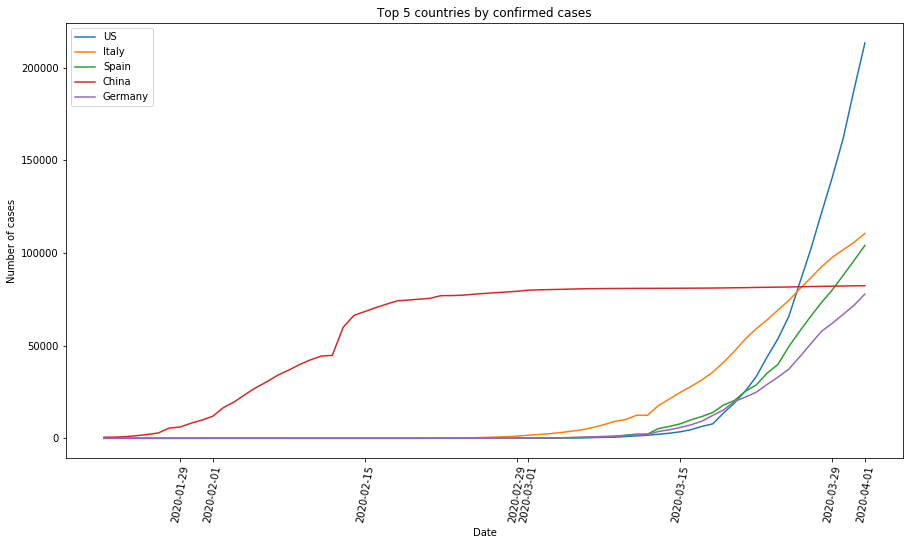

In [10]:
plot_top5(data)

This graph shows the 5 countries with more deaths

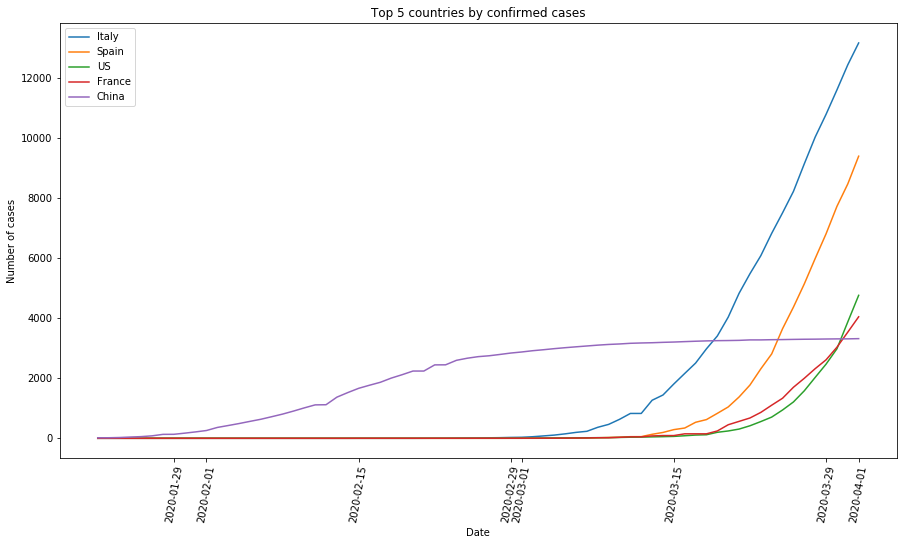

In [11]:
plot_top5(deaths)

## Part 2: Global overview

In the next section we'll display information about the crisis in all over the world

First case for the world detected on 2020-01-22 00:00:00. 70 days have passed since then
Max number of new cases: 75,160.0
Currently having 932,768 confirmed cases


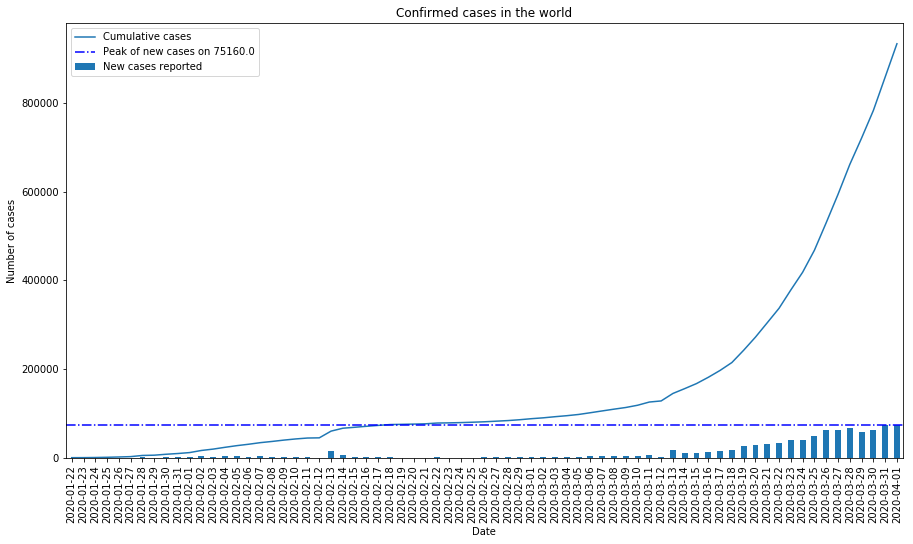

In [12]:
plot_country_cases(data, 'the world', changes=changes)

First case for the world detected on 2020-01-22 00:00:00. 70 days have passed since then
Highest number of daily deaths: 4,709.0
Currently having 46,817 confirmed cases


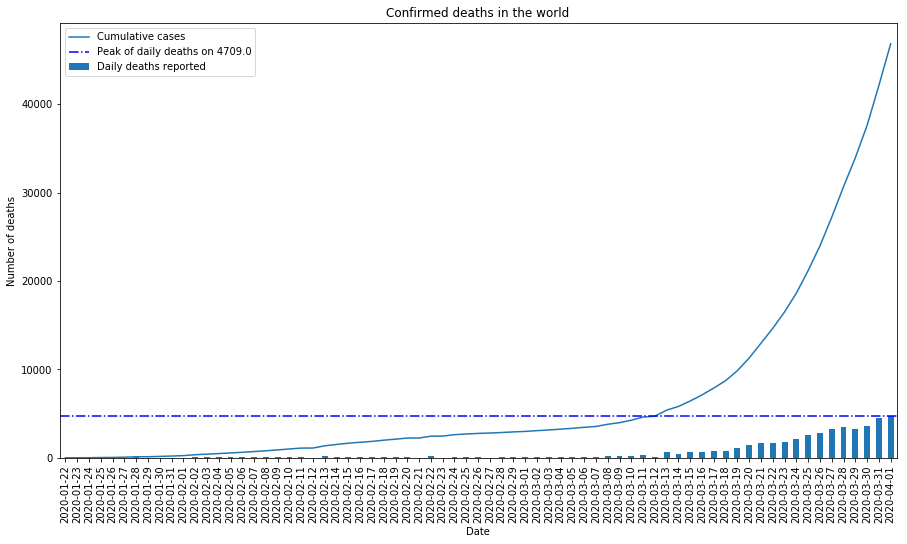

In [13]:
plot_country_deaths(deaths, 'the world', changes=death_changes)

## Part 3: Countries overview

The following sections depicts graphs of data available of confirmed cases per country.

### Mexico

Primer caso en Mexico detectado el 2020-02-27 00:00:00. Han pasado 34 días desde entonces
Máximo número de nuevos casos: 163.0
Cuarentena iniciada en 2020-03-23
Actualmente hay 1,378 casos confirmados


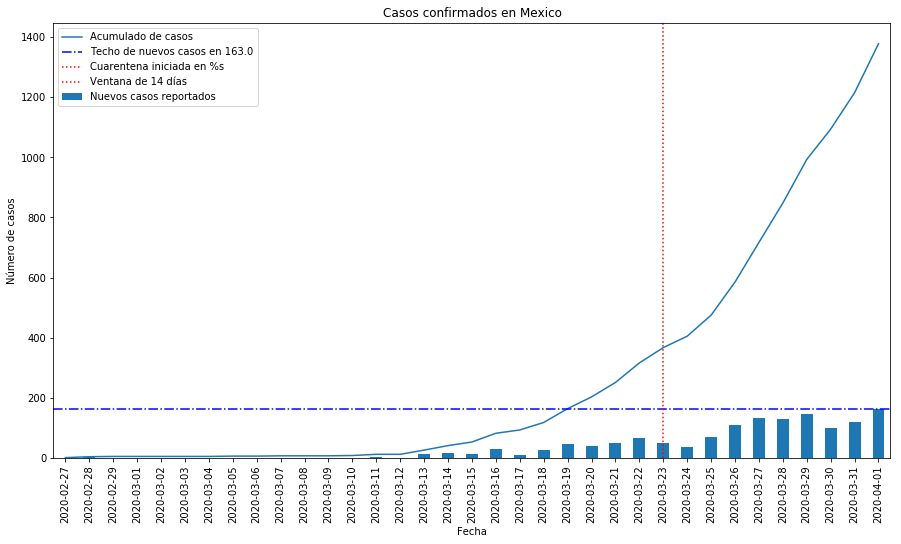

Date
2020-03-28    131.0
2020-03-29    145.0
2020-03-30    101.0
2020-03-31    121.0
2020-04-01    163.0
Name: Mexico, dtype: float64
Date
2020-03-28    18.270572
2020-03-29    17.099057
2020-03-30    10.171198
2020-03-31    11.060329
2020-04-01    13.415638
Name: Mexico, dtype: float64


In [14]:
plot_country_cases(data, 'Mexico', changes=changes, language='es', ld_date='2020-03-23')
print(changes['Mexico'].tail())
print(data['Mexico'].pct_change().tail() * 100)

Primer caso en Mexico detectado el 2020-03-18 00:00:00. Han pasado 14 días desde entonces
Máximo número de muertes reportadas: 8.0
Actualmente hay 37 casos confirmados


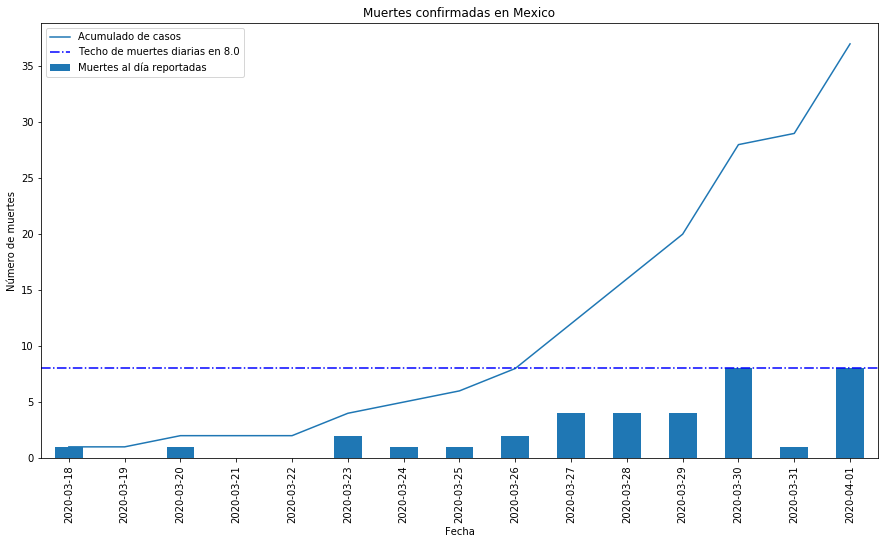

Date
2020-03-28    33.333333
2020-03-29    25.000000
2020-03-30    40.000000
2020-03-31     3.571429
2020-04-01    27.586207
Name: Mexico, dtype: float64


In [15]:
plot_country_deaths(deaths, 'Mexico', changes=death_changes, language='es')
print(deaths['Mexico'].pct_change().tail() * 100)

### Italy

Primer caso en Italy detectado el 2020-01-31 00:00:00. Han pasado 61 días desde entonces
Máximo número de nuevos casos: 6,557.0
Cuarentena iniciada en 2020-03-10
Actualmente hay 110,574 casos confirmados


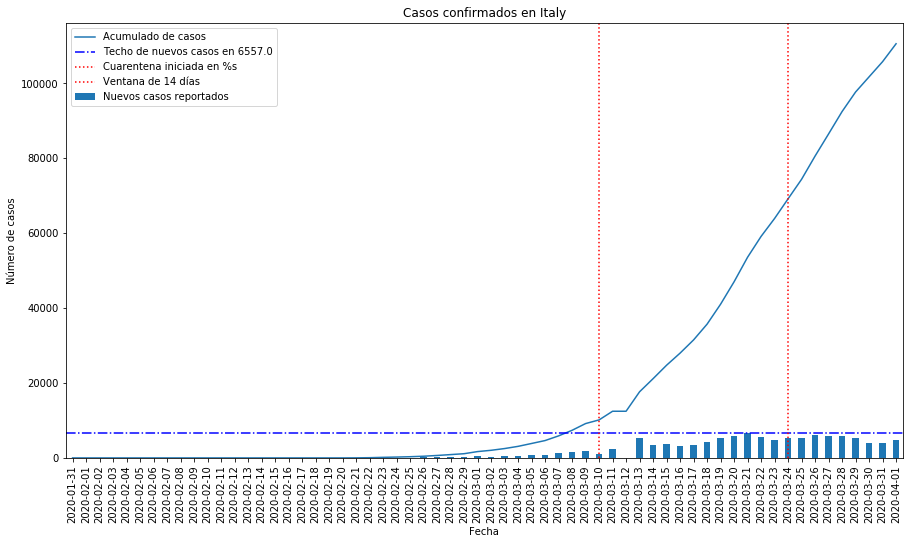

In [16]:
plot_country_cases(data, 'Italy',  changes=changes, language='es', ld_date='2020-03-10')

Primer caso en Italy detectado el 2020-02-21 00:00:00. Han pasado 40 días desde entonces
Máximo número de muertes reportadas: 919.0
Cuarentena iniciada en 2020-03-10
Actualmente hay 13,155 casos confirmados


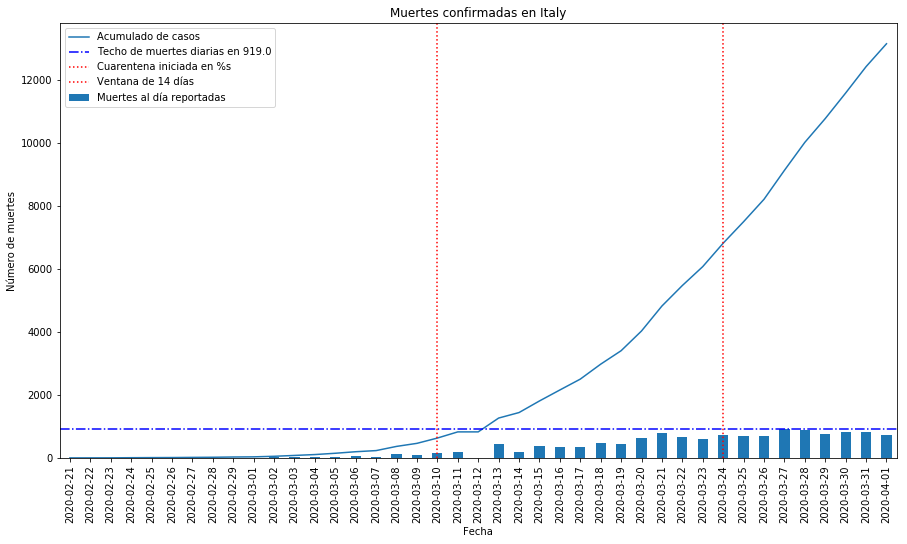

In [17]:
plot_country_deaths(deaths, 'Italy', language='es', changes=death_changes, ld_date='2020-03-10')

### China

Primer caso en China detectado el 2020-01-22 00:00:00. Han pasado 70 días desde entonces
Máximo número de nuevos casos: 15,136.0
Cuarentena iniciada en 2020-01-25
Actualmente hay 82,361 casos confirmados


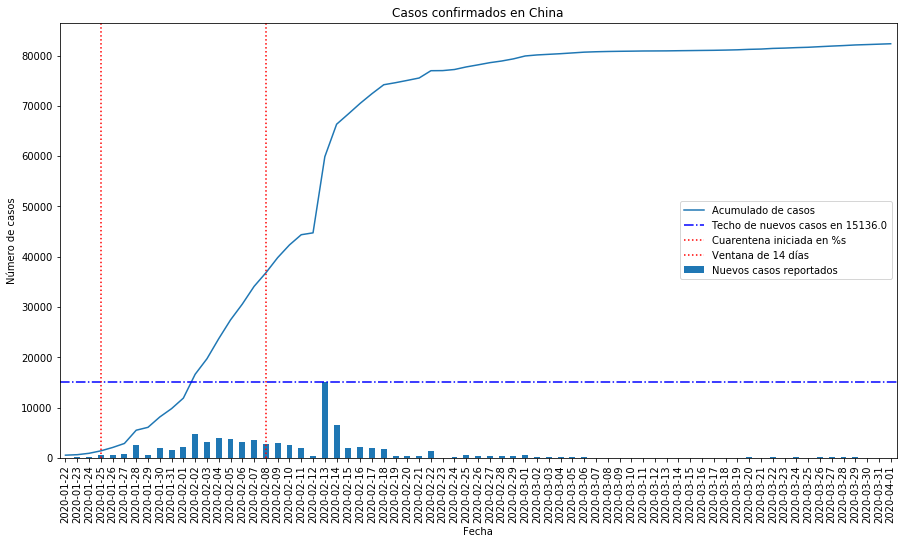

In [18]:
plot_country_cases(data, 'China', '2020-01-25', language='es', changes=changes)

First case for China detected on 2020-01-22 00:00:00. 70 days have passed since then
Highest number of daily deaths: 252.0
Currently having 3,316 confirmed cases


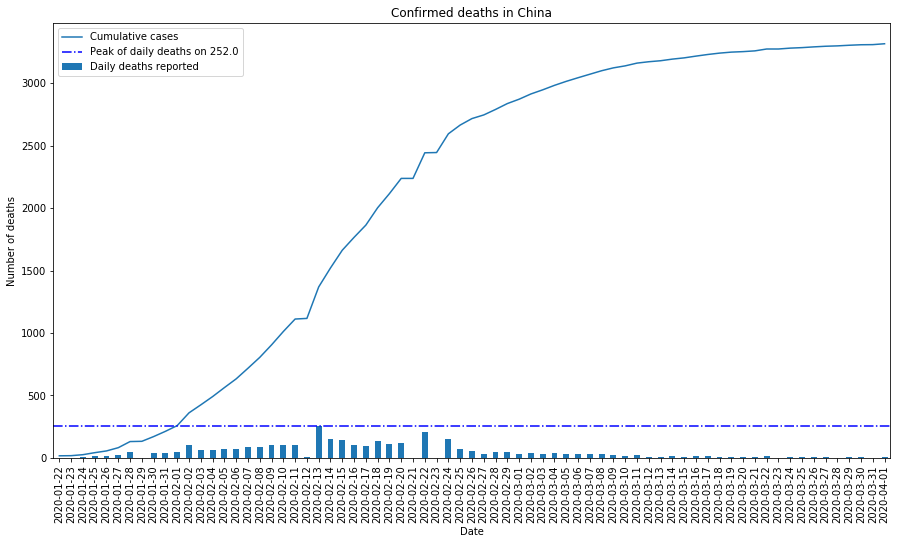

In [19]:
plot_country_deaths(deaths, 'China', changes=death_changes)

### South Korea

South Korea is a really special case. Although is one of the 5 nations with most confirmed cases, it also has a really low mortality rate. The high quantity of confirmed cases is atributed to the openess of the government, and the fact they're capable of doing 10,000 tests per day.

Primer caso en Korea, South detectado el 2020-01-22 00:00:00. Han pasado 70 días desde entonces
Máximo número de nuevos casos: 851.0
Actualmente hay 9,887 casos confirmados


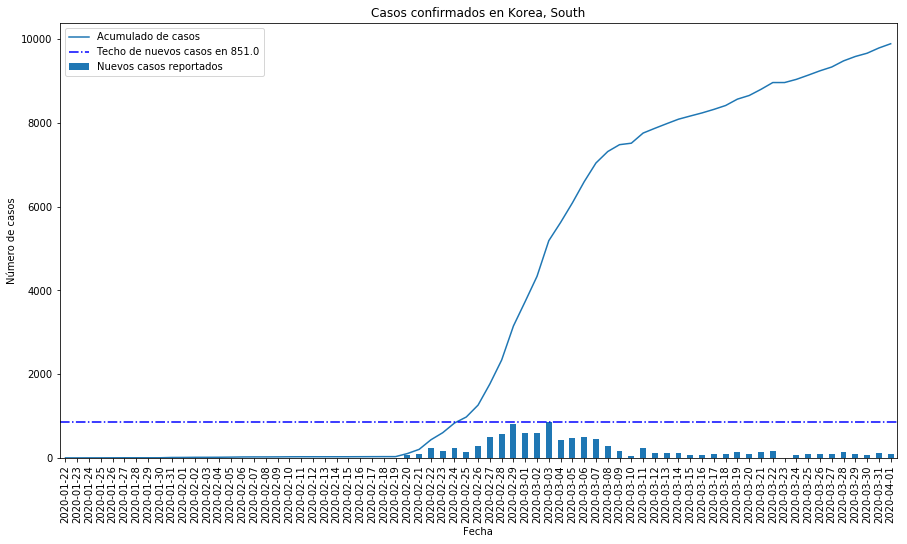

In [20]:
plot_country_cases(data, 'Korea, South', changes=changes, language='es')

Primer caso en Korea, South detectado el 2020-02-20 00:00:00. Han pasado 41 días desde entonces
Máximo número de muertes reportadas: 11.0
Actualmente hay 165 casos confirmados


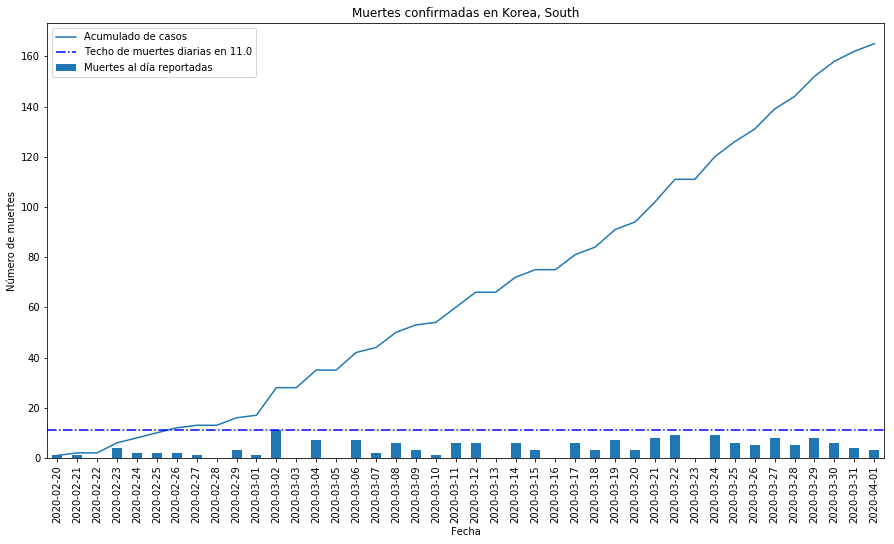

In [21]:
plot_country_deaths(deaths, 'Korea, South', changes=death_changes, language='es')

### Chile

First case for Chile detected on 2020-03-03 00:00:00. 29 days have passed since then
Max number of new cases: 310.0
Currently having 3,031 confirmed cases


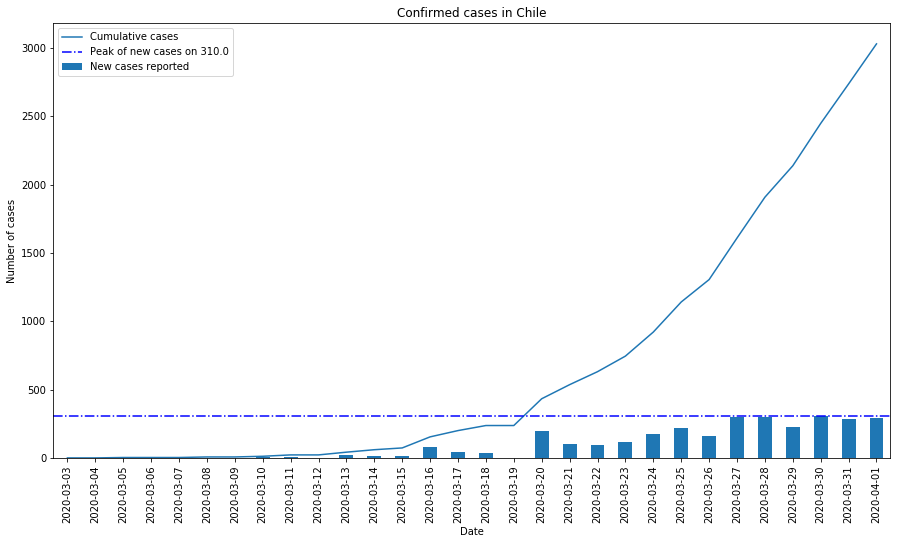

In [22]:
plot_country_cases(data, 'Chile', changes=changes)

First case for Chile detected on 2020-03-22 00:00:00. 10 days have passed since then
Highest number of daily deaths: 4.0
Currently having 16 confirmed cases


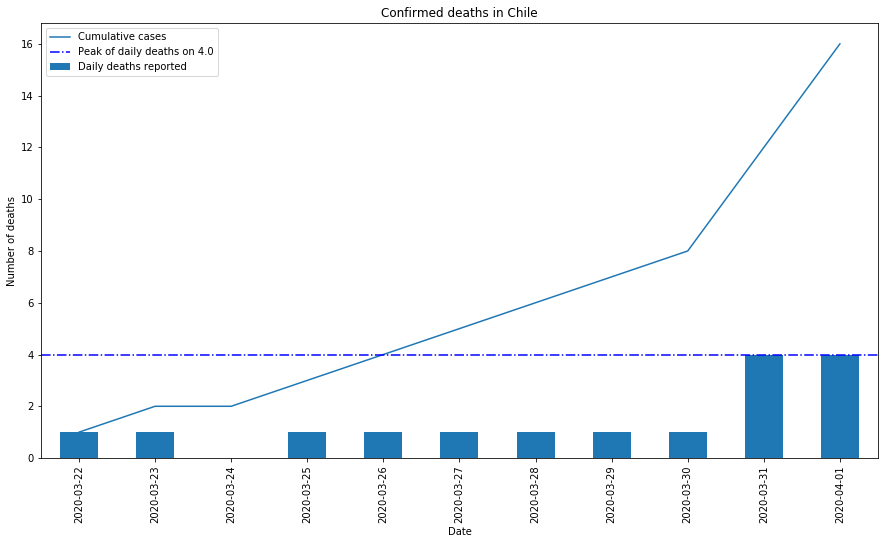

In [23]:
plot_country_deaths(deaths, 'Chile', changes=death_changes)

### Spain

First case for Spain detected on 2020-02-01 00:00:00. 60 days have passed since then
Max number of new cases: 9,630.0
Currently having 104,118 confirmed cases


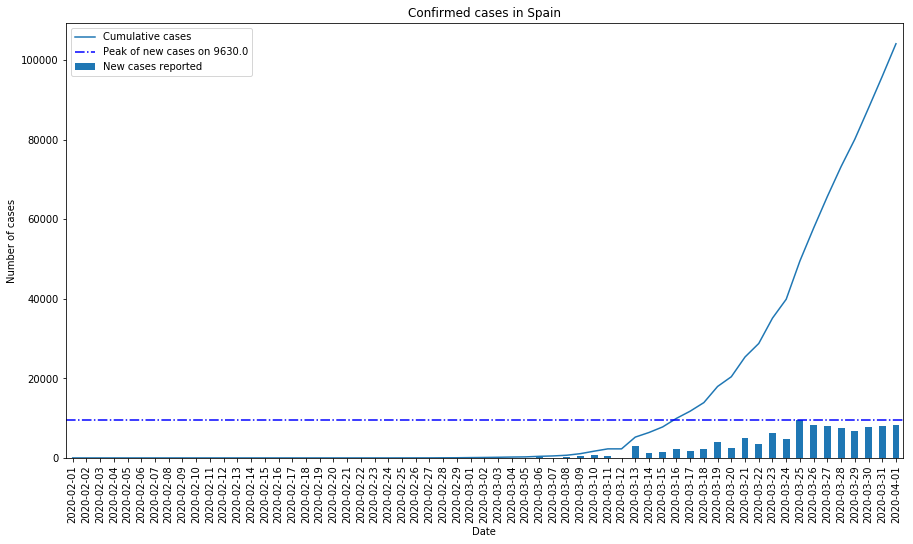

In [24]:
plot_country_cases(data, 'Spain', changes=changes)

Primer caso en Spain detectado el 2020-03-03 00:00:00. Han pasado 29 días desde entonces
Máximo número de muertes reportadas: 923.0
Actualmente hay 9,387 casos confirmados


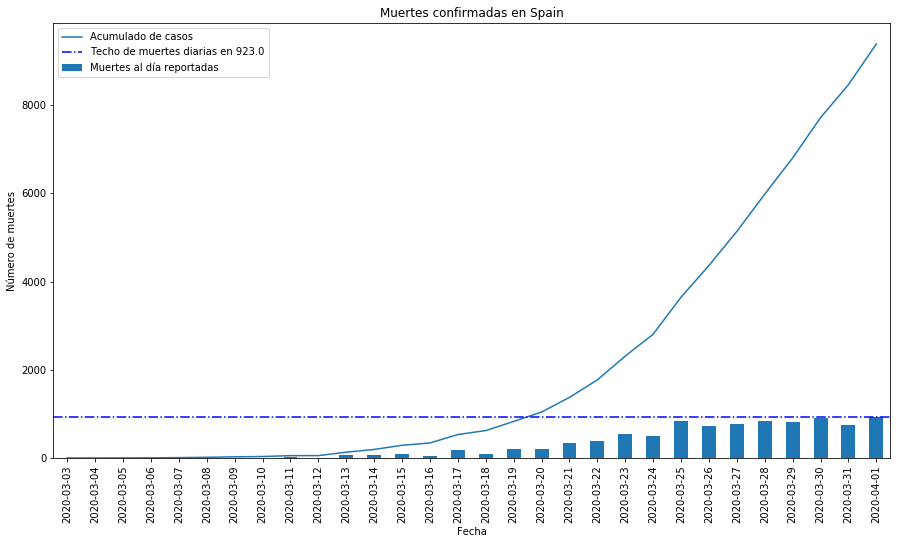

In [25]:
plot_country_deaths(deaths, 'Spain', changes=death_changes, language='es')

### United States

Primer caso en US detectado el 2020-01-22 00:00:00. Han pasado 70 días desde entonces
Máximo número de nuevos casos: 26,365.0
Actualmente hay 213,372 casos confirmados


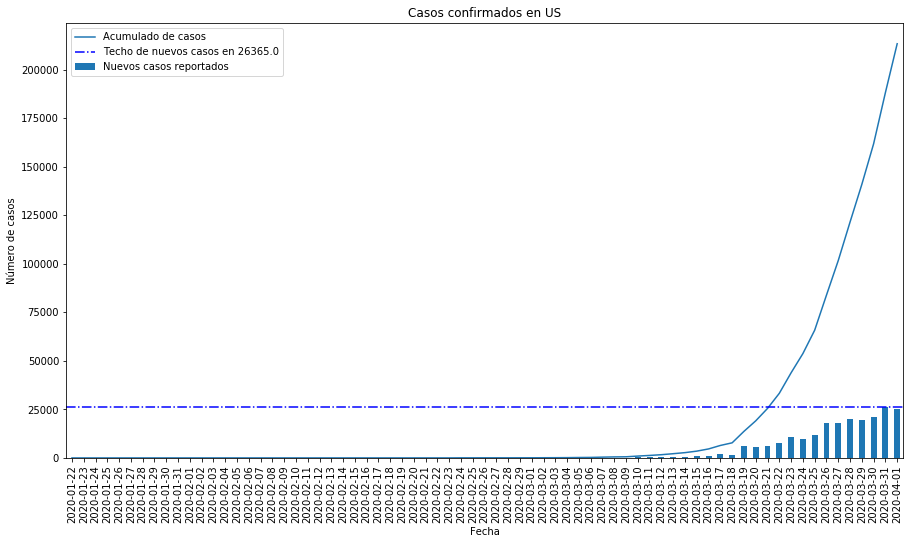

Primer caso en US detectado el 2020-02-29 00:00:00. Han pasado 32 días desde entonces
Máximo número de muertes reportadas: 895.0
Actualmente hay 4,757 casos confirmados


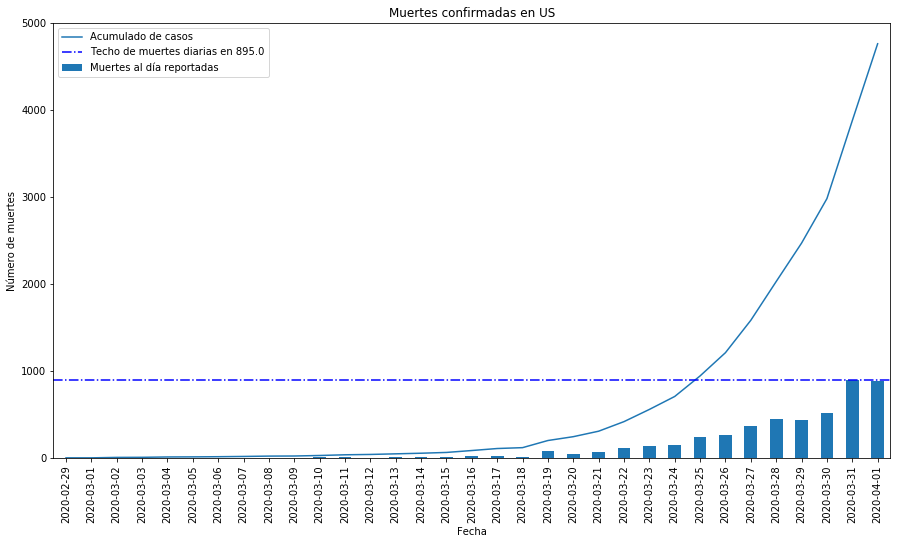

In [26]:
plot_country_cases(data, 'US', changes=changes, language='es')
plot_country_deaths(deaths, 'US', changes=death_changes, language='es')